In [ ]:
# TFM - Eduardo Colmenares 

In [52]:
from datetime import datetime, timedelta,date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from __future__ import division
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib import style
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score


In [53]:
df_expe = pd.read_csv("DATOS_TFM_ANALISISv2.csv",sep =";", encoding='latin',decimal=",",thousands=".")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4596\3908081370.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_expe = pd.read_csv("DATOS_TFM_ANALISISv2.csv",sep =";", encoding='latin',decimal=",",thousands=".")


In [5]:
df_expe.dtypes

Fecha               object
expedicion           int64
Nº Cliente           int64
Departamento        object
Tipo Portes         object
C.P. Origen        float64
Pob. Origen         object
C.P. Destino        object
Pob. Destino        object
País Destino        object
Ámbito              object
Servicio            object
Envase              object
Kilos              float64
Bultos               int64
Excesos              int64
Situación           object
Fecha Ent.          object
Receptor            object
Expe_km_entrega    float64
dtype: object

In [6]:
df_expe.shape

(384692, 20)

In [7]:
df_expe.describe()

,expedicion,Nº Cliente,C.P. Origen,Kilos,Bultos,Excesos,Expe_km_entrega
count,384692.000000,384692.000000,3.782110e+05,384692.000000,384692.000000,384692.000000,384692.000000
mean,192346.500000,119.167898,1.557633e+04,2.022523,1.136694,0.062141,9.946906
std,111051.159214,274.190789,1.358420e+05,10.814384,1.239855,0.366659,29.710249
min,1.000000,0.000000,1.004000e+03,0.300000,1.000000,0.000000,0.000000
25%,96173.750000,14.000000,8.097000e+03,1.000000,1.000000,0.000000,0.000000
50%,192346.500000,50.000000,8.097000e+03,1.000000,1.000000,0.000000,0.000000
75%,288519.250000,204.000000,8.208000e+03,1.000000,1.000000,0.000000,0.000000
max,384692.000000,99989.000000,9.900106e+06,2742.000000,107.000000,30.000000,506.000000


In [8]:
df_expe.columns

Index(['Fecha', 'expedicion ', 'Nº Cliente', 'Departamento', 'Tipo Portes',
       'C.P. Origen', 'Pob. Origen', 'C.P. Destino', 'Pob. Destino',
       'País Destino', 'Ámbito', 'Servicio', 'Envase', 'Kilos', 'Bultos',
       'Excesos', 'Situación', 'Fecha Ent.', 'Receptor', 'Expe_km_entrega'],
      dtype='object')

In [9]:
print(df_expe['Servicio'].unique())

['DAC' 'NX19' 'EUT' 'PPK' 'ENX' 'NX12' 'BMR' '830H' 'PB1' 'P.U.' 'NX10'
 'SAB' 'I-P' '24H' 'INT2' '48H' 'CMR' 'EUE' 'AER' 'PPE' 'EXS' 'P' 'INT1']


In [54]:
# Agrupar los servicios en 4 categorias 

df_expe["service"] = df_expe.Servicio.replace({'DAC': "OT", 'NX19':"19H", 'EUT':"OT", 'PPK':'PPK', 'ENX':"ECO", 'NX12':"PRE", 'BMR':"OT", '830H':"PRE", 'PB1':"OT", 'P.U.':"OT", 'NX10': "PRE",
 'SAB':"OT", 'I-P':"OT", '24H':"CAN", 'INT2':"OT", '48H':"CAN", 'CMR':"OT", 'EUE':"OT", 'AER':"OT", 'PPE':"OT", 'EXS':"ECO", 'P':"OT", 'INT1':"OT"})
df_expe["service_value"] = df_expe.service.replace({'ECO': 1.0, '19H':1.9, 'OT':1.4, 'PPK':1.1, 'PRE':3.0, 'CAN':1.5})

# Valorar los servicios por el Precio medio que tiene cada categoria  
df_expe["service_value"] = df_expe.service.replace({'ECO': 1.0, '19H':1.9, 'OT':1.4, 'PPK':1.1, 'PRE':3.0, 'CAN':1.5})

# Valorar la tipologia de bulto por la preferencia del negocio   

df_expe["Kilos_value"] = np.where(df_expe["Kilos"]<=5,3,np.where(df_expe["Kilos"]<=10,2,np.where(df_expe["Kilos"]<20,1,0)))


df_expe.head(10)




,Fecha,expedicion,Nº Cliente,Departamento,Tipo Portes,C.P. Origen,Pob. Origen,C.P. Destino,Pob. Destino,País Destino,...,Kilos,Bultos,Excesos,Situación,Fecha Ent.,Receptor,Expe_km_entrega,service,service_value,Kilos_value
0,04/01/2022,1,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,05/01/2022,RECEPTOR,0.0,OT,1.4,3
1,12/01/2022,2,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,13/01/2022,RECEPTOR,0.0,OT,1.4,3
2,14/01/2022,3,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,17/01/2022,RECEPTOR,0.0,OT,1.4,3
3,20/01/2022,4,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,21/01/2022,RECEPTOR,0.0,OT,1.4,3
4,24/01/2022,5,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,9.0,2,2,OK,25/01/2022,RECEPTOR,0.0,19H,1.9,2
5,31/01/2022,6,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,01/02/2022,RECEPTOR,0.0,OT,1.4,3
6,02/02/2022,7,14,NaN,D,1004.0,VITORIA,08097,SPEEDLINK,ES-ESPAÑA,...,16.0,2,1,OK,03/02/2022,RECEPTOR,0.0,19H,1.9,1
7,15/02/2022,8,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,16/02/2022,RECEPTOR,0.0,OT,1.4,3
8,17/02/2022,9,2,SHIPMENT,T,NaN,NaN,6422PH,HEERLEN,NL-HOLANDA,...,0.7,1,0,OK,18/02/2022,SELLO,0.0,OT,1.4,3
9,17/02/2022,10,14,NaN,D,1004.0,VITORIA,08097,SPEEDLINK,ES-ESPAÑA,...,6.0,1,1,OK,18/02/2022,RECEPTOR,0.0,19H,1.9,2


In [55]:
# valorar los clientes por 3 categorias 

#CATEGORIA1 = produccion media mensual
#filtrar produccion por mes
df_expe["month"]=df_expe.Fecha.str.split("/", n=0).str[1]
df_expe["Year"]=df_expe.Fecha.str.split("/", n=0).str[2]

#Expediciones medias por mes de los clientes 
df_cli_prod_m = df_expe.groupby(['Nº Cliente','month'])['expedicion '].count().reset_index()
df_cli_prod_m = df_expe.groupby(['Nº Cliente'])['expedicion '].mean().reset_index()

#Valorar las medias de los clienets por su volumen  
df_cli_prod_m["prod_value"] = np.where(df_cli_prod_m['expedicion ']<=140000,0,np.where(df_cli_prod_m['expedicion ']<=180000,1,np.where(df_cli_prod_m['expedicion ']<220000,2,3)))
df_cli_cat1 = df_cli_prod_m.groupby(['Nº Cliente'])['prod_value'].mean().reset_index()

#CATEGORIA2 = Tipo de mercancia 

df_cli_cat2 = df_expe.groupby(['Nº Cliente'])['Kilos_value'].mean().reset_index()

#CATEGORIA3 = Tipo de servicio 
df_cli_cat3 = df_expe.groupby(['Nº Cliente'])['service_value'].mean().reset_index()
df_cli_cat3.head(20)

# DATAFRAME EVALUACION CLIENTES 

df_clients_values = pd.merge(df_cli_cat1, df_cli_cat2, on=['Nº Cliente'])
df_clients_values = pd.merge(df_clients_values, df_cli_cat3, on=['Nº Cliente'])

#df_clients_values.head(10)


In [56]:
df_clients_values.columns


Index(['Nº Cliente', 'prod_value', 'Kilos_value', 'service_value'], dtype='object')

(array([ 4.,  0., 10.,  4., 22.,  0.,  0.,  2.,  3.,  9.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

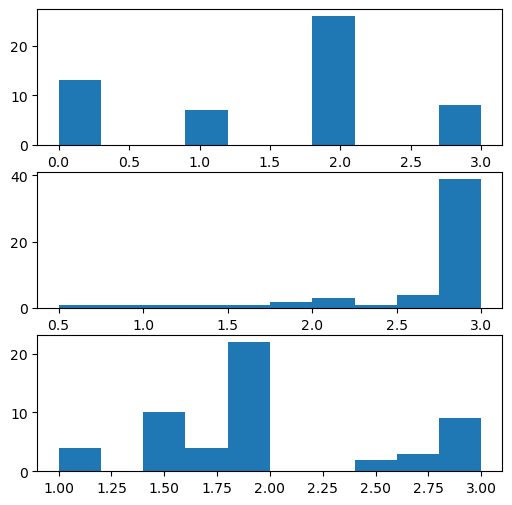

In [65]:
fig, ax = plt.subplots(3,1, figsize=(6,6))
ax[0].hist(df_clients_values["prod_value"])
ax[1].hist(df_clients_values['Kilos_value'])
ax[2].hist(df_clients_values['service_value'])


In [69]:
# Clustering modelo kmeans

# Modelo
X_scaled = df_clients_values[["prod_value",'Kilos_value','service_value']]
modelo_kmeans = KMeans(n_clusters=3, n_init=10)
modelo_kmeans.fit(X=X_scaled)
y_predict = modelo_kmeans.predict(X=X_scaled)

In [ ]:
#Evaluacion de muestras a implementar en proyecto

In [33]:
df_expe.columns


Index(['Fecha', 'expedicion ', 'Nº Cliente', 'Departamento', 'Tipo Portes',
       'C.P. Origen', 'Pob. Origen', 'C.P. Destino', 'Pob. Destino',
       'País Destino', 'Ámbito', 'Servicio', 'Envase', 'Kilos', 'Bultos',
       'Excesos', 'Situación', 'Fecha Ent.', 'Receptor', 'Expe_km_entrega',
       'service', 'service_value', 'Kilos_value'],
      dtype='object')

In [22]:
df_muestra = df_expe.head(20)
df_muestra

,Fecha,expedicion,Nº Cliente,Departamento,Tipo Portes,C.P. Origen,Pob. Origen,C.P. Destino,Pob. Destino,País Destino,...,Kilos,Bultos,Excesos,Situación,Fecha Ent.,Receptor,Expe_km_entrega,service,service_value,Kilos_value
0,04/01/2022,1,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,05/01/2022,RECEPTOR,0.0,OT,1.4,3
1,12/01/2022,2,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,13/01/2022,RECEPTOR,0.0,OT,1.4,3
2,14/01/2022,3,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,17/01/2022,RECEPTOR,0.0,OT,1.4,3
3,20/01/2022,4,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,21/01/2022,RECEPTOR,0.0,OT,1.4,3
4,24/01/2022,5,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,9.0,2,2,OK,25/01/2022,RECEPTOR,0.0,19H,1.9,2
5,31/01/2022,6,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,01/02/2022,RECEPTOR,0.0,OT,1.4,3
6,02/02/2022,7,14,NaN,D,1004.0,VITORIA,08097,SPEEDLINK,ES-ESPAÑA,...,16.0,2,1,OK,03/02/2022,RECEPTOR,0.0,19H,1.9,1
7,15/02/2022,8,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,1.0,1,0,OK,16/02/2022,RECEPTOR,0.0,OT,1.4,3
8,17/02/2022,9,2,SHIPMENT,T,NaN,NaN,6422PH,HEERLEN,NL-HOLANDA,...,0.7,1,0,OK,18/02/2022,SELLO,0.0,OT,1.4,3
9,17/02/2022,10,14,NaN,D,1004.0,VITORIA,08097,SPEEDLINK,ES-ESPAÑA,...,6.0,1,1,OK,18/02/2022,RECEPTOR,0.0,19H,1.9,2


In [63]:
df_muestra["month"]=df_muestra.Fecha.str.split("/", n=0).str[1]
df_muestra["Year"]=df_muestra.Fecha.str.split("/", n=0).str[2]
df_muestra.head(10)
#df.date = df.date.str.split("-", n=1).str[0]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20884\1234684586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muestra["month"]=df_muestra.Fecha.str.split("/", n=0).str[1]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20884\1234684586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muestra["Year"]=df_muestra.Fecha.str.split("/", n=0).str[2]


,Fecha,expedicion,Nº Cliente,Departamento,Tipo Portes,C.P. Origen,Pob. Origen,C.P. Destino,Pob. Destino,País Destino,...,Situación,Fecha Ent.,Receptor,Expe_km_entrega,service,service_value,Kilos_value,mes,month,Year
0,04/01/2022,1,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,05/01/2022,RECEPTOR,0.0,OT,1.4,3,NaN,01,2022
1,12/01/2022,2,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,13/01/2022,RECEPTOR,0.0,OT,1.4,3,NaN,01,2022
2,14/01/2022,3,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,17/01/2022,RECEPTOR,0.0,OT,1.4,3,NaN,01,2022
3,20/01/2022,4,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,21/01/2022,RECEPTOR,0.0,OT,1.4,3,NaN,01,2022
4,24/01/2022,5,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,25/01/2022,RECEPTOR,0.0,19H,1.9,2,NaN,01,2022
5,31/01/2022,6,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,01/02/2022,RECEPTOR,0.0,OT,1.4,3,NaN,01,2022
6,02/02/2022,7,14,NaN,D,1004.0,VITORIA,08097,SPEEDLINK,ES-ESPAÑA,...,OK,03/02/2022,RECEPTOR,0.0,19H,1.9,1,NaN,02,2022
7,15/02/2022,8,14,NaN,D,1004.0,VITORIA,08097,BARCELONA (ABONADO ),ES-ESPAÑA,...,OK,16/02/2022,RECEPTOR,0.0,OT,1.4,3,NaN,02,2022
8,17/02/2022,9,2,SHIPMENT,T,NaN,NaN,6422PH,HEERLEN,NL-HOLANDA,...,OK,18/02/2022,SELLO,0.0,OT,1.4,3,NaN,02,2022
9,17/02/2022,10,14,NaN,D,1004.0,VITORIA,08097,SPEEDLINK,ES-ESPAÑA,...,OK,18/02/2022,RECEPTOR,0.0,19H,1.9,2,NaN,02,2022


In [70]:


df_cli_prod_m = df_muestra.groupby(['Nº Cliente','month'])['expedicion '].count().reset_index()
df_cli_prod_m = df_muestra.groupby(['Nº Cliente'])['expedicion '].mean().reset_index()


df_cli_prod_m["prod_value"] = np.where(df_cli_prod_m['expedicion ']<=100,0,np.where(df_cli_prod_m['expedicion ']<=1000,1,np.where(df_cli_prod_m['expedicion ']<10000,2,3)))

df_cli_cat1 = df_cli_prod_m.groupby(['Nº Cliente'])['prod_value'].mean().reset_index()

df_cli_cat1.head(20)

,Nº Cliente,prod_value
0,2,0.0
1,14,0.0
2,50,0.0
3,60,0.0
4,300,0.0


In [35]:
df_cli_cat2 = df_muestra.groupby(['Nº Cliente'])['Kilos_value'].mean().reset_index()
df_cli_cat2.head(20)

,Nº Cliente,Kilos_value
0,2,3.0000
1,14,2.6875
2,50,3.0000
3,60,3.0000
4,300,3.0000


In [36]:
df_cli_cat3 = df_muestra.groupby(['Nº Cliente'])['service_value'].mean().reset_index()
df_cli_cat3.head(20)

,Nº Cliente,service_value
0,2,1.4000
1,14,1.5875
2,50,1.9000
3,60,1.9000
4,300,1.9000


In [39]:
nuevo_df = pd.merge(df_cli_cat1, df_cli_cat2, on=['Nº Cliente'])
nuevo_df = pd.merge(nuevo_df, df_cli_cat3, on=['Nº Cliente'])
nuevo_df.head(10)

,Nº Cliente,expedicion,Kilos_value,service_value
0,2,1,3.0000,1.4000
1,14,16,2.6875,1.5875
2,50,1,3.0000,1.9000
3,60,1,3.0000,1.9000
4,300,1,3.0000,1.9000


In [34]:
df_muestra.groupby(['Nº Cliente','service']).agg({'expedicion '.count()})
#df.groupby(['A', 'B'])['C'].count()


# resultado = df.groupby('ciudad')['edad'].mean().reset_index()


#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#['Fecha', 'expedicion ', 'Nº Cliente', 'Departamento', 'Tipo Portes',
#      'C.P. Origen', 'Pob. Origen', 'C.P. Destino', 'Pob. Destino',
#       'País Destino', 'Ámbito', 'Servicio', 'Envase', 'Kilos', 'Bultos',
#       'Excesos', 'Situación', 'Fecha Ent.', 'Receptor', 'Expe_km_entrega'],
#      dtype='object')
print(df_muestra)

TypeError: count() takes at least 1 argument (0 given)

In [32]:
df_muestra.groupby(['Nº Cliente','service']).['expedicion '].count()
#df.groupby(['A', 'B'])['C'].count()

df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#['Fecha', 'expedicion ', 'Nº Cliente', 'Departamento', 'Tipo Portes',
#      'C.P. Origen', 'Pob. Origen', 'C.P. Destino', 'Pob. Destino',
#       'País Destino', 'Ámbito', 'Servicio', 'Envase', 'Kilos', 'Bultos',
#       'Excesos', 'Situación', 'Fecha Ent.', 'Receptor', 'Expe_km_entrega'],
#      dtype='object')
print(df_muestra)

         Fecha  expedicion   Nº Cliente Departamento Tipo Portes  C.P. Origen  \
0   04/01/2022            1          14          NaN           D       1004.0   
1   12/01/2022            2          14          NaN           D       1004.0   
2   14/01/2022            3          14          NaN           D       1004.0   
3   20/01/2022            4          14          NaN           D       1004.0   
4   24/01/2022            5          14          NaN           D       1004.0   
5   31/01/2022            6          14          NaN           D       1004.0   
6   02/02/2022            7          14          NaN           D       1004.0   
7   15/02/2022            8          14          NaN           D       1004.0   
8   17/02/2022            9           2     SHIPMENT           T          NaN   
9   17/02/2022           10          14          NaN           D       1004.0   
10  21/02/2022           11          14          NaN           D       1004.0   
11  28/02/2022           12 

In [13]:
df_expeuser=pd.DataFrame(df_expe['Nº Cliente'].unique())
df_expeuser.columns=['Nº Cliente']
df_expeuser.head(10)

,Nº Cliente
0,14
1,2
2,50
3,300
4,60
5,206
6,301
7,204
8,202
9,1


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_expe)
profile

In [ ]:
df_expeuser=pd.DataFrame(df_expe['Nº Cliente'].unique())
df_expeuser.columns=['Nº Cliente']

In [ ]:
df_expeuser.head(10)

In [ ]:
df_expe["Envase_num"]= df['Envase']

In [ ]:
df_expe.Envase_num.head(10)

In [ ]:
df_expe["Envase_num"] = df_expe.Envase.replace({'BAG': 1, 'PAQ': 2, 'MUE': 3, 'DOC': 3, 'DOCS': 3})
df_expe.head(10)

In [ ]:
num_envase = {'BAG':1, 'PAQ':2 'MUE':3, 'DOC':3, 'DOCS':3}